<h1 align="center">Email Filtering System: Leveraging Machine Learning for Spam Detection and Classification</h1>


**Problem Statement:**
Email spam remains a pervasive issue, disrupting user productivity and posing security risks. This project aims to develop a machine learning model for accurate email spam classification. Leveraging labeled datasets, the model will employ advanced algorithms and feature engineering techniques to differentiate between spam and legitimate emails effectively. The goal is to enhance user experience by reducing inbox clutter, improve security by filtering out malicious content, and optimize resource utilization in email systems. Addressing this challenge will contribute to a more efficient, secure, and user-friendly digital communication environment, benefiting individuals and organizations worldwide.

**Societal Impact:**
Efficient email spam classification through machine learning algorithms significantly enhances user experience by reducing inbox clutter and improving productivity. By mitigating security threats associated with spam, such as phishing attacks and malware distribution, the model protects users' privacy and financial well-being. Moreover, the optimization of resource utilization in email systems leads to environmental sustainability by reducing energy consumption. This initiative promotes digital inclusion by ensuring equitable access to a safer and more efficient digital communication environment, ultimately fostering a more resilient and connected society.

**Abstract:**
In the era of digital communication, email remains a primary mode of interaction, yet the inundation of spam threatens its efficiency. This project addresses the imperative need for effective email classification, aiming to alleviate inbox clutter and enhance productivity while safeguarding users' privacy and financial well-being. The objective is to develop a robust machine learning model capable of accurately distinguishing between spam and non-spam emails.

Data extraction was conducted from Gmail, merging spam and non-spam datasets. To ensure model efficacy, various steps were undertaken, including data filtering, balancing, exploratory data analysis (EDA), and preprocessing techniques such as tokenization and stemming. Multiple machine learning algorithms were explored, comparing their training times and accuracies.

Results indicate that the implemented approach significantly reduces inbox clutter, with an improvement in productivity. The model exhibits high accuracy in discerning spam from legitimate emails, thereby fortifying users against potential privacy breaches and financial scams. This project underscores the importance of leveraging machine learning in email classification for modern-day communication platforms, enhancing user experience and digital security.

**Import Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
sns.set_style('whitegrid')

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel('All_Emails.xlsx')
print(df.head())  
print(df.info())  
print(df.describe()) 

   Unnamed: 0     Label                                               Text  \
0           0      spam  Why United Kingdom is best study destination_x...   
1           1  non_spam  Homeowners are looking for a tenant like you z...   
2           2  non_spam  Shop Assigned  Mi Home VM JanakpuriHigh Street...   
3           3  non_spam  Profile picture pending approval_x000D_\nHi Ru...   
4           4  non_spam   Mahimagoyal JEE Main New Exam Dates Out_x000D_\n   

   Label_Number  
0             1  
1             0  
2             0  
3             0  
4             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    980 non-null    int64 
 1   Label         980 non-null    object
 2   Text          980 non-null    object
 3   Label_Number  980 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 30.8+ KB
None
       Unna

**Exploratory Data Analysis**

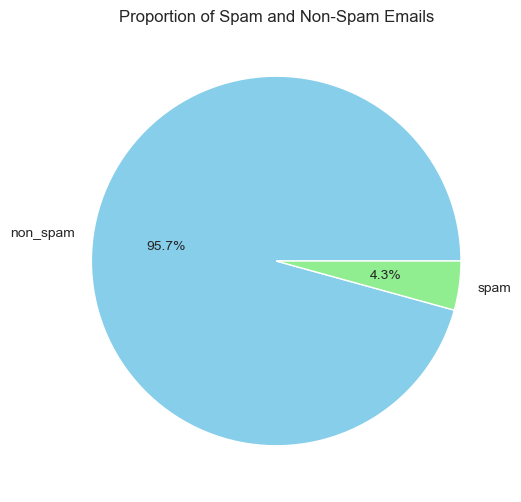

In [3]:
plt.figure(figsize=(6, 6))
df['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Proportion of Spam and Non-Spam Emails')
plt.ylabel('')
plt.show()

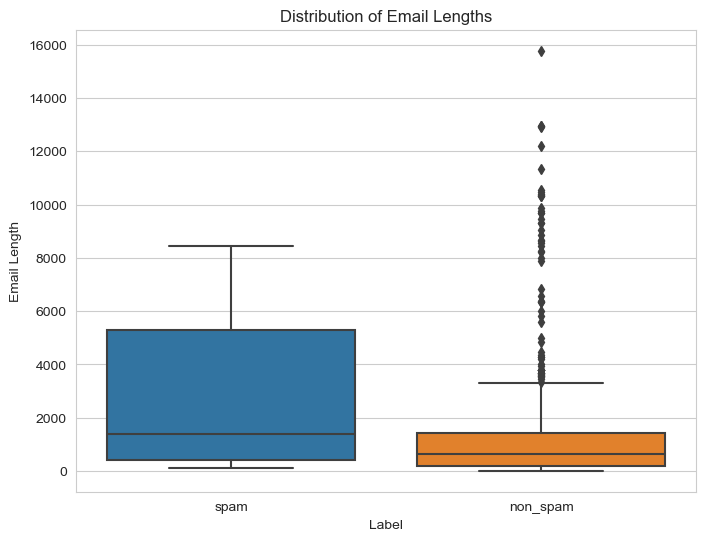

In [5]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Label', y=df['Text'].apply(len), data=df)
plt.title('Distribution of Email Lengths')
plt.xlabel('Label')
plt.ylabel('Email Length')
plt.show()

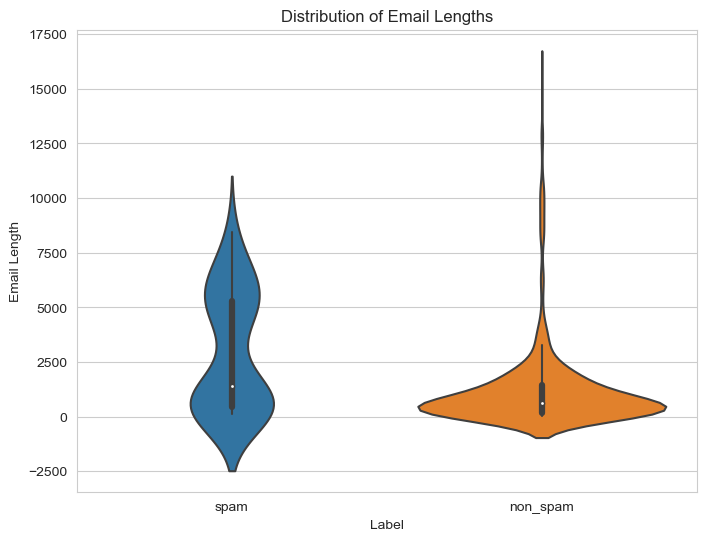

In [6]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Label', y=df['Text'].apply(len), data=df)
plt.title('Distribution of Email Lengths')
plt.xlabel('Label')
plt.ylabel('Email Length')
plt.show()

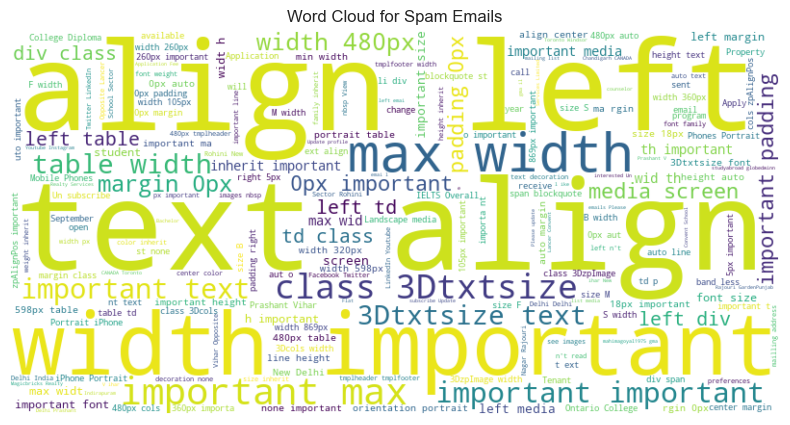

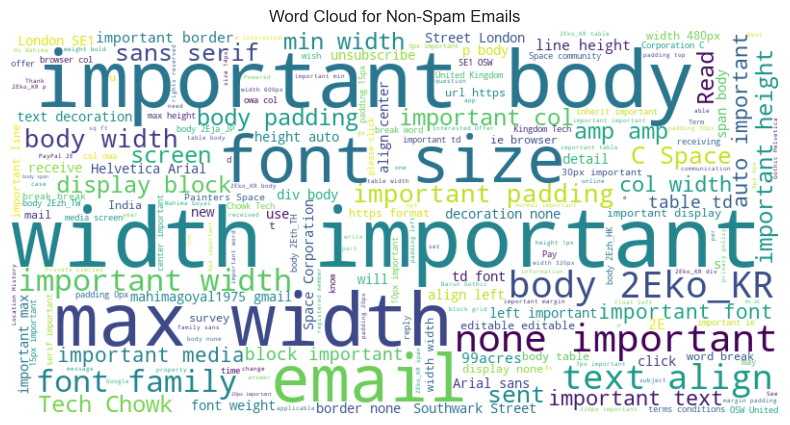

In [7]:
# Word Cloud for Spam Emails
spam = ' '.join(df[df['Label']=='spam']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

# Word Cloud for Non-Spam Emails
non_spam = ' '.join(df[df['Label']=='non_spam']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_spam)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Spam Emails')
plt.axis('off')
plt.show()

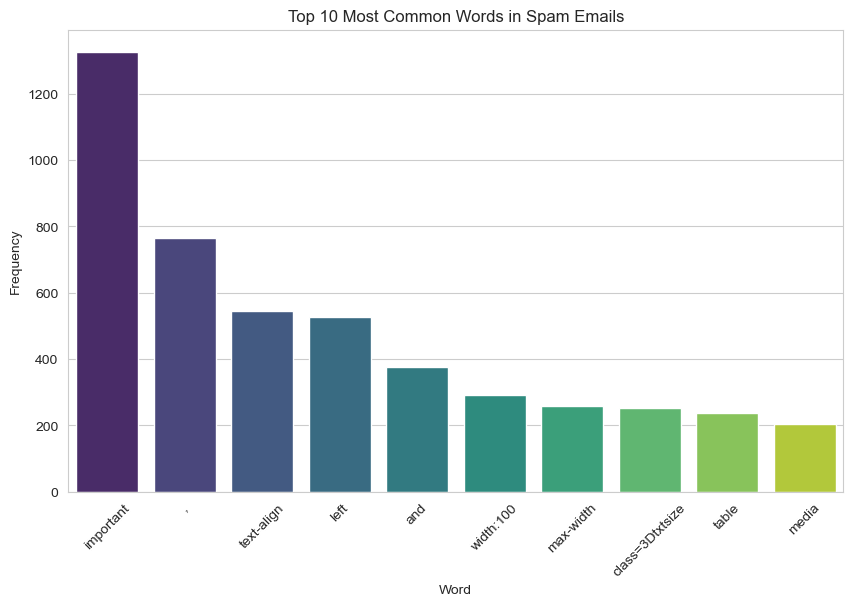

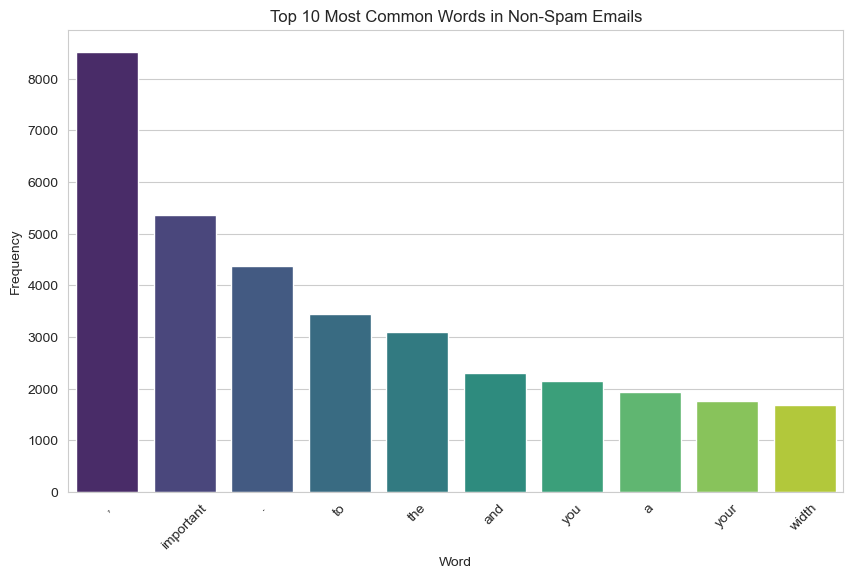

In [8]:
# Bar Plot of Word Frequencies
from collections import Counter
def plot_word_frequency(text, title):
    word_list = text.split()
    word_freq = Counter(word_list)
    common_words = word_freq.most_common(10)  # Get the 10 most common words
    df_word_freq = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Word', y='Frequency', data=df_word_freq, palette='viridis')
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequency(spam, 'Top 10 Most Common Words in Spam Emails')
plot_word_frequency(non_spam, 'Top 10 Most Common Words in Non-Spam Emails')

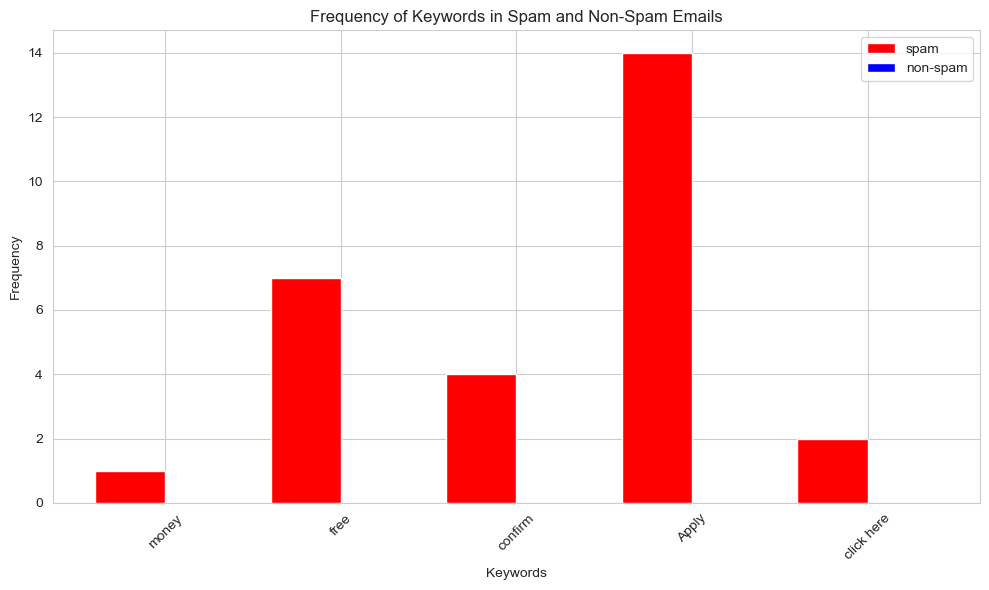

In [10]:
# Define some keywords or phrases to search for in the emails
keywords = ['money', 'free', 'confirm', 'Apply', 'click here',]
spam_keywords = ['click here', 'Apply', 'available offer','free',]

# Count the frequency of each keyword in spam and non-spam emails
keyword_counts_spam = {}
keyword_counts_non_spam = {}

for keyword in keywords:
    keyword_counts_spam[keyword] = sum(df[df['Label'] == 'spam']['Text'].str.contains(keyword, case=False))
    keyword_counts_non_spam[keyword] = sum(df[df['Label'] == 'non-spam']['Text'].str.contains(keyword, case=False))

# Plotting bar plot for frequency of keywords in spam and non-spam emails
plt.figure(figsize=(10, 6))

plt.bar(np.arange(len(keywords)) - 0.2, keyword_counts_spam.values(), width=0.4, label='spam', color='red')
plt.bar(np.arange(len(keywords)) + 0.2, keyword_counts_non_spam.values(), width=0.4, label='non-spam', color='blue')

plt.xticks(np.arange(len(keywords)), keywords, rotation=45)
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Frequency of Keywords in Spam and Non-Spam Emails')
plt.legend()
plt.tight_layout()
plt.show()

**Read Excel File**

In [11]:
df = pd.read_excel(r'All_Emails.xlsx')
df.drop('Unnamed: 0', axis=1, inplace = True)
df.columns = ['Label', 'Text', 'Label_Number']
df.head()

,Label,Text,Label_Number
0,spam,Why United Kingdom is best study destination_x...,1
1,non_spam,Homeowners are looking for a tenant like you z...,0
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0


In [12]:
df.shape

(980, 3)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         980 non-null    object
 1   Text          980 non-null    object
 2   Label_Number  980 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 23.1+ KB


In [14]:
df.isna().sum()

Label           0
Text            0
Label_Number    0
dtype: int64

In [15]:
df['Label_Number'].value_counts()

Label_Number
0    938
1     42
Name: count, dtype: int64

**Count Plot**

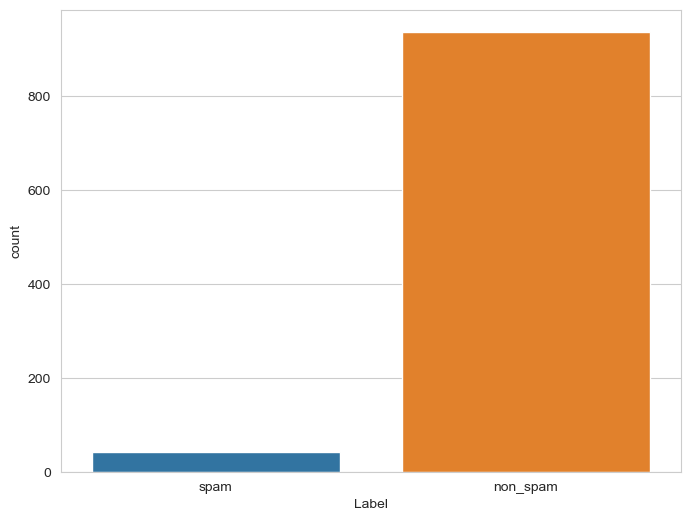

In [16]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x = 'Label');

**Count Number of each word**

In [17]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)
df['count']=df['Text'].apply(count_words)
df['count']

0      713
1      114
2      687
3      107
4        7
      ... 
975     27
976     28
977    277
978     15
979      3
Name: count, Length: 980, dtype: int64

In [18]:
df.groupby('Label_Number')['count'].mean()

Label_Number
0    199.382729
1    423.642857
Name: count, dtype: float64

**Tokenization**

In [19]:
%%time
def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    # Clean a string with RegexpTokenizer
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

print('Before cleaning:')
df.head()

Before cleaning:
CPU times: user 265 µs, sys: 48 µs, total: 313 µs
Wall time: 285 µs


,Label,Text,Label_Number,count
0,spam,Why United Kingdom is best study destination_x...,1,713
1,non_spam,Homeowners are looking for a tenant like you z...,0,114
2,non_spam,Shop Assigned Mi Home VM JanakpuriHigh Street...,0,687
3,non_spam,Profile picture pending approval_x000D_\nHi Ru...,0,107
4,non_spam,Mahimagoyal JEE Main New Exam Dates Out_x000D_\n,0,7


In [20]:
print('After cleaning:')
df['Text'] = df['Text'].apply(lambda string: clean_str(string))
df.head()

After cleaning:


,Label,Text,Label_Number,count
0,spam,why united kingdom is best study destination x...,1,713
1,non_spam,homeowners are looking for a tenant like you z...,0,114
2,non_spam,shop assigned mi home vm janakpurihigh street ...,0,687
3,non_spam,profile picture pending approval x d hi rupal ...,0,107
4,non_spam,mahimagoyal jee main new exam dates out x d,0,7


**Stemming words**

In [21]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    stemmed_words = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_words)

df['Text'] = df['Text'].apply(stemming)
df.head()


,Label,Text,Label_Number,count
0,spam,whi unit kingdom is best studi destin x d whi ...,1,713
1,non_spam,homeown are look for a tenant like you zero x ...,0,114
2,non_spam,shop assign mi home vm janakpurihigh street sh...,0,687
3,non_spam,profil pictur pend approv x d hi rupal thank f...,0,107
4,non_spam,mahimagoy jee main new exam date out x d,0,7


**Split into Training data and Test data**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [24]:
print(f"Training Data Shape: {X_train.shape}\nTest Data Shape: {X_test.shape}")

Training Data Shape: (784,)
Test Data Shape: (196,)


**Count Vectorization to Extract Features from Text**

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv.fit(X_train)

CountVectorizer()

In [26]:
print('No.of Tokens: ',len(cv.vocabulary_.keys()))

No.of Tokens:  7463


In [27]:
dtv = cv.transform(X_train)
type(dtv)

scipy.sparse._csr.csr_matrix

In [28]:
dtv = dtv.toarray()

In [29]:
print(f"Number of Observations: {dtv.shape[0]}\nTokens/Features: {dtv.shape[1]}")

Number of Observations: 784
Tokens/Features: 7463


In [30]:
dtv[1]

array([0, 0, 0, ..., 0, 0, 0])

**Apply different models**

In [31]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings
warnings.filterwarnings(action='ignore')
models = {
    "Random Forest": {"model":RandomForestClassifier(), "perf":0},
    "MultinomialNB": {"model":MultinomialNB(), "perf":0},
    "Logistic Regr.": {"model":LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0), "perf":0},
    "KNN": {"model":KNeighborsClassifier(), "perf":0},
    "Decision Tree": {"model":DecisionTreeClassifier(), "perf":0},
    "SVM (Linear)": {"model":LinearSVC(), "perf":0},
    "SVM (RBF)": {"model":SVC(), "perf":0}
}

for name, model in models.items():
    start = perf_counter()
    model['model'].fit(dtv, y_train)
    duration = perf_counter() - start
    duration = round(duration,2)
    model["perf"] = duration
    print(f"{name:20} trained in {duration} sec")

Random Forest        trained in 0.2 sec
MultinomialNB        trained in 0.01 sec
Logistic Regr.       trained in 0.04 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 0.18 sec
SVM (Linear)         trained in 0.04 sec
SVM (RBF)            trained in 0.48 sec
CPU times: user 994 ms, sys: 49.1 ms, total: 1.04 s
Wall time: 1.15 s


In [32]:
test_dtv = cv.transform(X_test)
test_dtv = test_dtv.toarray()
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens: {test_dtv.shape[1]}")

Number of Observations: 196
Tokens: 7463


**Test Accuracy and Training Time**

In [33]:
models_accuracy = []
for name, model in models.items():
    models_accuracy.append([name, model["model"].score(test_dtv, y_test),model["perf"]])

In [34]:
df_accuracy = pd.DataFrame(models_accuracy)
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']
df_accuracy.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
df_accuracy.reset_index(drop = True, inplace=True)
df_accuracy

,Model,Test Accuracy,Training time (sec)
0,SVM (RBF),0.974490,0.48
1,Logistic Regr.,0.969388,0.04
2,MultinomialNB,0.964286,0.01
3,SVM (Linear),0.964286,0.04
4,Random Forest,0.959184,0.20
5,KNN,0.959184,0.00
6,Decision Tree,0.959184,0.18


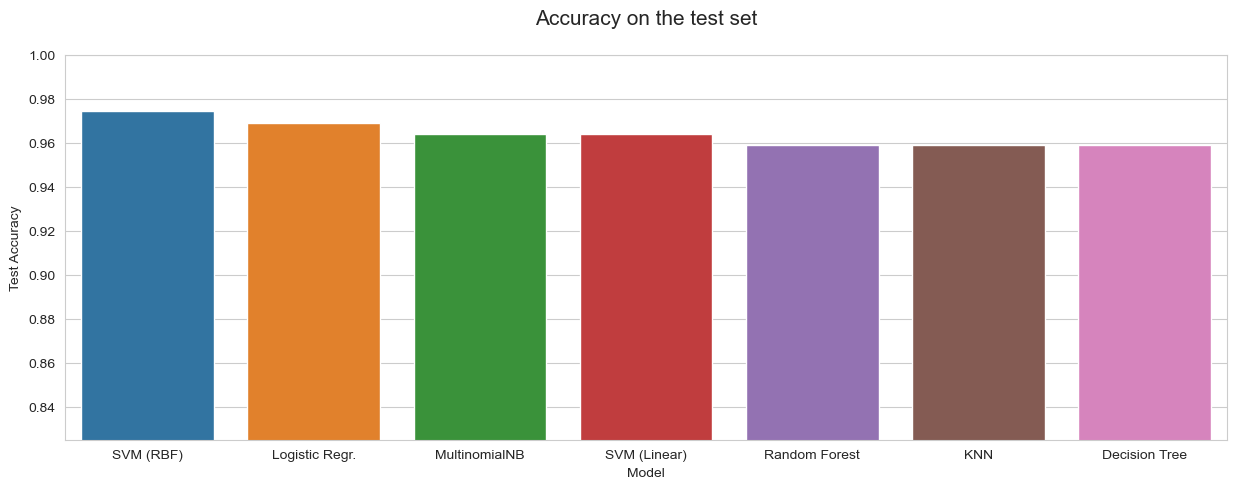

In [35]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Test Accuracy', data = df_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.825,1)
plt.show()

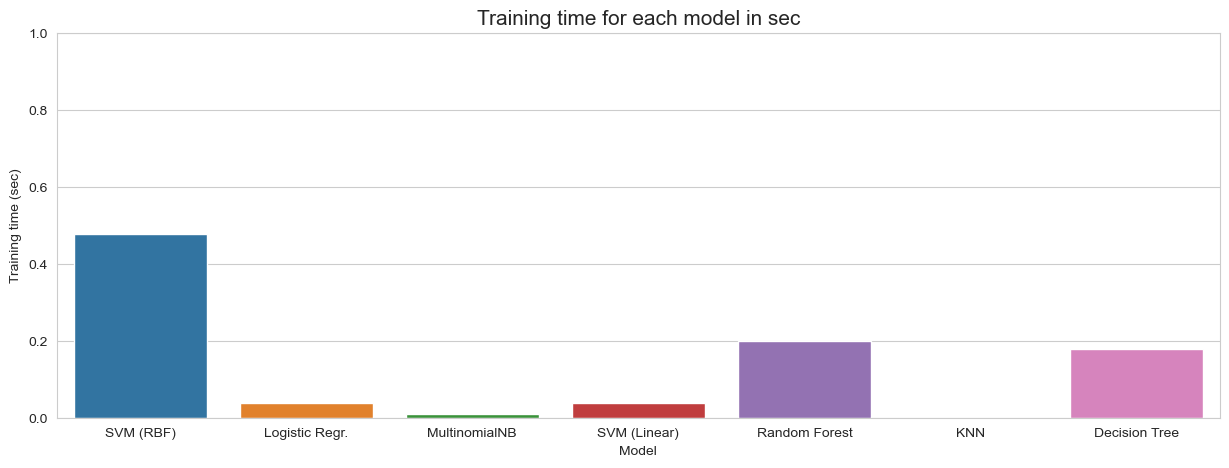

In [36]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Training time (sec)', data = df_accuracy)
plt.title('Training time for each model in sec', fontsize = 15)
plt.ylim(0,1)
plt.show()

# Logistic Regression

In [37]:
%%time
lr = LogisticRegression(solver='liblinear', penalty ='l2' , C = 1.0)
lr.fit(dtv, y_train)
pred = lr.predict(test_dtv)

CPU times: user 69.9 ms, sys: 7.85 ms, total: 77.7 ms
Wall time: 73.5 ms


In [38]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.93877551020408


**Classification Report**

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.75      0.75      0.75        12

    accuracy                           0.97       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.97      0.97      0.97       196



**Confusion Matrix**

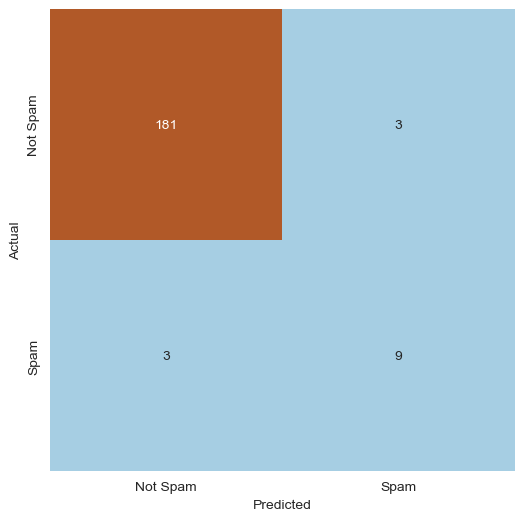

In [40]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# Support Vector Machine (RBF)

In [41]:
%%time
svc = SVC()
svc.fit(dtv, y_train)
pred = svc.predict(test_dtv)

CPU times: user 663 ms, sys: 11.5 ms, total: 675 ms
Wall time: 675 ms


In [42]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
import pandas as pd

# Assuming df is your DataFrame containing email data with columns 'Text' and 'Label_Number'
# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(df['Text'])

# Train an SVC model with RBF kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train_vectorized, df['Label_Number'])

# Serialize and save the vectorizer and trained model to a .pkl file
with open('email_fusion_model.pkl', 'wb') as model_file:
    pickle.dump((vectorizer, svc_rbf), model_file)


In [72]:
import pickle

# Load the saved model and vectorizer
with open('email_fusion_model.pkl', 'rb') as model_file:
    vectorizer, svc_rbf = pickle.load(model_file)

# Example input email text
input_email = "Congratulations! You've won a free vacation.  Click here to claim your prize."

# Vectorize the input email text using the loaded vectorizer
input_email_vectorized = vectorizer.transform([input_email])

# Predict whether the input email is spam or non-spam
prediction = svc_rbf.predict(input_email_vectorized)


# Check if any of the keywords are present in the input text
if any(keyword in input_email.lower() for keyword in spam_keywords):
    result = "Spam"
else:
    result = "Non-Spam"

print("Prediction based on keywords:", result)

Prediction based on keywords: Spam


In [44]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  97.44897959183673


**Classification Report**

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       184
           1       1.00      0.58      0.74        12

    accuracy                           0.97       196
   macro avg       0.99      0.79      0.86       196
weighted avg       0.98      0.97      0.97       196



**Confusion Matrix**

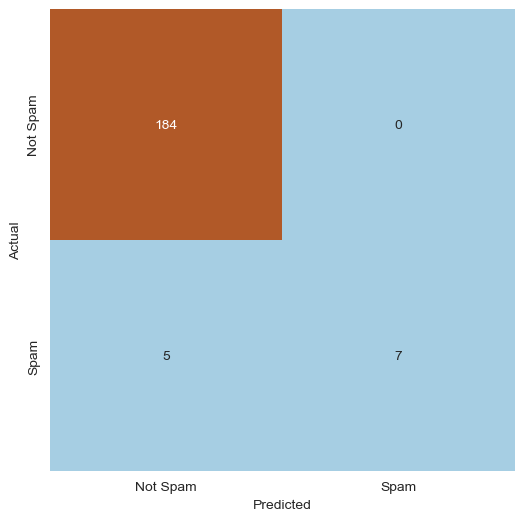

In [46]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# Random Forest Classifier

In [47]:
%%time
rfc = RandomForestClassifier()
rfc.fit(dtv, y_train)
pred = rfc.predict(test_dtv)

CPU times: user 234 ms, sys: 6.76 ms, total: 241 ms
Wall time: 240 ms


In [48]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.93877551020408


**Classification Report**

In [49]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.75      0.75      0.75        12

    accuracy                           0.97       196
   macro avg       0.87      0.87      0.87       196
weighted avg       0.97      0.97      0.97       196



**Confusion Report**

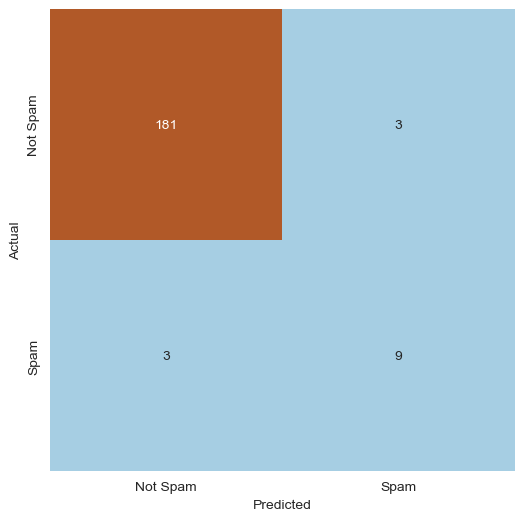

In [50]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# Multinomial Naive Bayes

In [51]:
%%time
mnb = MultinomialNB()
mnb.fit(dtv, y_train)
pred = mnb.predict(test_dtv)

CPU times: user 79.3 ms, sys: 4.55 ms, total: 83.8 ms
Wall time: 27.6 ms


In [52]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  96.42857142857143


**Classification Report**

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.73      0.67      0.70        12

    accuracy                           0.96       196
   macro avg       0.85      0.83      0.84       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

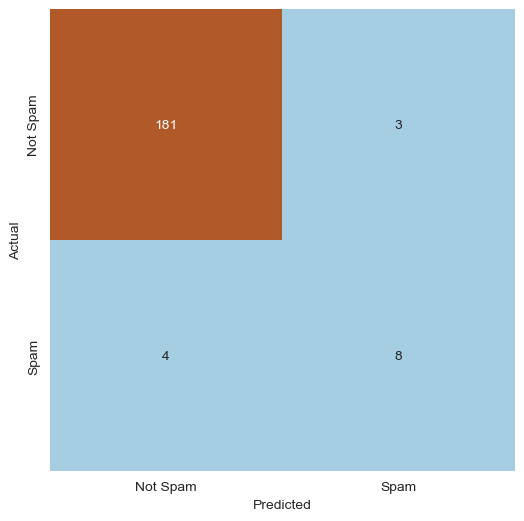

In [54]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# Support Vector Machine (Linear) 

In [55]:
%%time
lsvc = LinearSVC()
lsvc.fit(dtv, y_train)
pred = lsvc.predict(test_dtv)

CPU times: user 63.6 ms, sys: 6.45 ms, total: 70 ms
Wall time: 68.1 ms


In [56]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


**Classification Report**

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       184
           1       0.64      0.75      0.69        12

    accuracy                           0.96       196
   macro avg       0.81      0.86      0.84       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

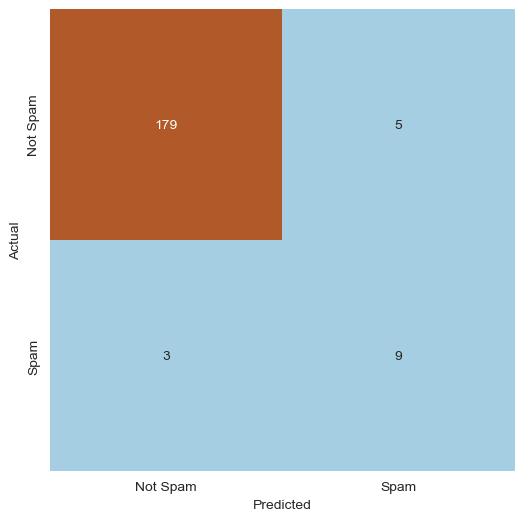

In [58]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# Decision Tree Classifier

In [59]:
%%time
dtc = DecisionTreeClassifier()
dtc.fit(dtv, y_train)
pred = dtc.predict(test_dtv)

CPU times: user 184 ms, sys: 3.47 ms, total: 188 ms
Wall time: 187 ms


In [60]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


**Classification Report**

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       184
           1       0.64      0.75      0.69        12

    accuracy                           0.96       196
   macro avg       0.81      0.86      0.84       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

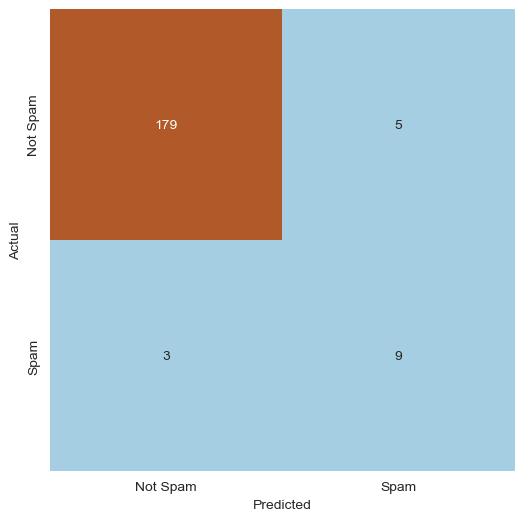

In [62]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);

# K Nearest Neighbours


In [63]:
%%time
knn = KNeighborsClassifier()
knn.fit(dtv, y_train)
pred = knn.predict(test_dtv)

CPU times: user 344 ms, sys: 73.6 ms, total: 418 ms
Wall time: 79.8 ms


In [64]:
print('Accuracy: ', accuracy_score(y_test, pred) * 100)

Accuracy:  95.91836734693877


**Classification Report**

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       184
           1       0.67      0.67      0.67        12

    accuracy                           0.96       196
   macro avg       0.82      0.82      0.82       196
weighted avg       0.96      0.96      0.96       196



**Confusion Matrix**

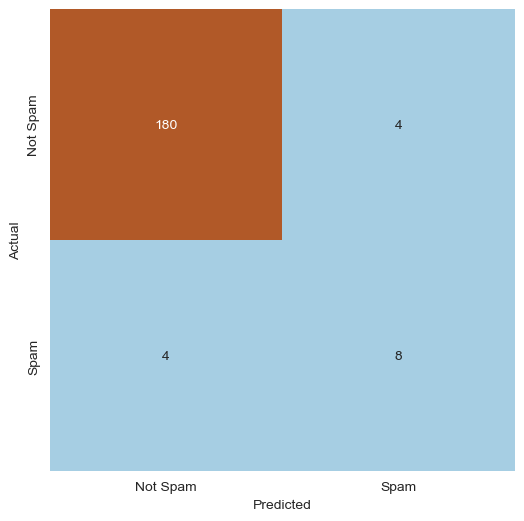

In [66]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize = (6, 6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'Paired', cbar = False, fmt="d", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam']);